### Student Information
Name: 張宜禎

Student ID: 105062208

GitHub ID: pclightyear

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

---

# **Part 1: Take Home Exercises**

In [1]:
# library import
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns
import plotly.express as px
import nltk
import helpers.data_mining_helpers as dmh
import helpers.DM_HW1_helpers as dmhwh

%matplotlib inline

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [3]:
# convert data into pandas dataframe
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
X.head()

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

###  >>> **Exercise 2 (take home)** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

#### Answer here

In [4]:
X.loc[:, 'text':'category'].head()

text  category
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3

In [5]:
X.iloc[5:, [0, 2]].head()

text           category_name
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  soc.religion.christian
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...  soc.religion.christian
7  From: aldridge@netcom.com (Jacquelin Aldridge)...                 sci.med
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...                 sci.med
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...                 sci.med

In [6]:
X.loc[X['category'] == 1, ['text', 'category_name']].head()

text  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...  comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...  comp.graphics
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...  comp.graphics
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...  comp.graphics
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...  comp.graphics

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer here
The pandas isnull() function doesn't considered strings like empty string, 'NaN', or 'None' as null values.

As the pandas documentation metioned, the function only detect values like python None value or numpy.NaN. Strings are not considered as null values.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
X_sample = X.sample(n=1000)
X_sample.head()

text  category  \
1004  From: steve@hcrlgw (Steven Collins) Subject: S...         1   
905   From: maridai@comm.mot.com (Marida Ignacio) Su...         3   
2207  From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...         1   
600   From: "Robert Knowles" <p00261@psilink.com> Su...         0   
417   From: rgc3679@bcstec.ca.boeing.com (Robert G. ...         1   

               category_name  
1004           comp.graphics  
905   soc.religion.christian  
2207           comp.graphics  
600              alt.atheism  
417            comp.graphics

#### Answer here
1. We add three columns (`text`, `category`, `category_name`) into `X`.
2. We add dummy null records and drop it from `X`.
3. We add dummy duplicated records and drop it from `X`.
4. We randomly sample 1000 records from `X`, the records in the new dataframe `X_sample` are not sorted in the original order.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

#### Answer here

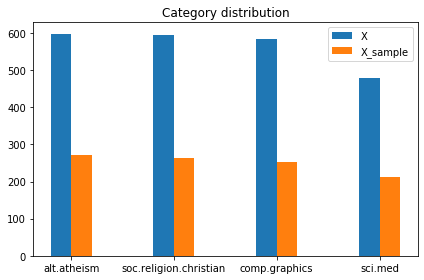

In [10]:
bar_width = 0.2
index = np.arange(len(categories))

fig = plt.figure()
ax = fig.subplots()

rects1 = ax.bar(index - bar_width/2, X.category_name.value_counts(), bar_width, label='X')
rects2 = ax.bar(index + bar_width/2, X_sample.category_name.value_counts(), bar_width, label='X_sample')

ax.set_title('Category distribution')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

fig.tight_layout()
plt.show()

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [11]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
X_counts.shape

(2257, 35788)

#### Answer here

In [12]:
# get the index of the nonzero value in the document
for idx in X_counts[4, 0:100].nonzero()[1]:
    print(count_vect.get_feature_names()[idx])

00
01


---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

#### Answer here
Since the term matrix is sparse, we utilize matplotlib.pyplot.spy to get heatmap-like visualization.

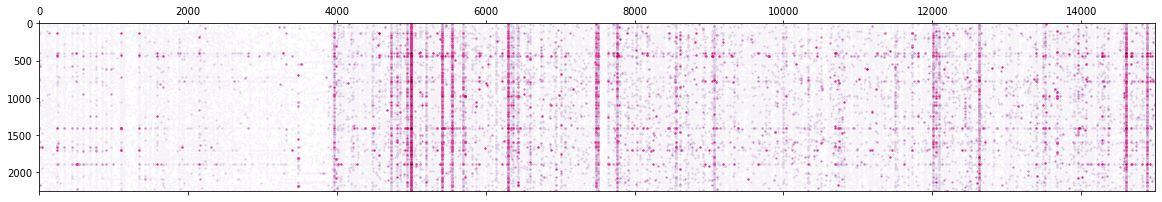

In [13]:
# heatmap-like visualization using matplotlib spy
precisions = [0, 2, 5, 10, 50, 150]
# color palette reference: cmap='PuRd'
colors = ['#F6F3F8', '#DDCCE4', '#CD8AC2', '#E6308E', '#B80B4E', '#67001F']

plt.subplots(figsize=(20, 25))

# plot first 15000 terms
for p, c in zip(precisions, colors):
    plt.spy(X_counts[:, :15000], precision=p, markersize=1, color=c)

plt.show()

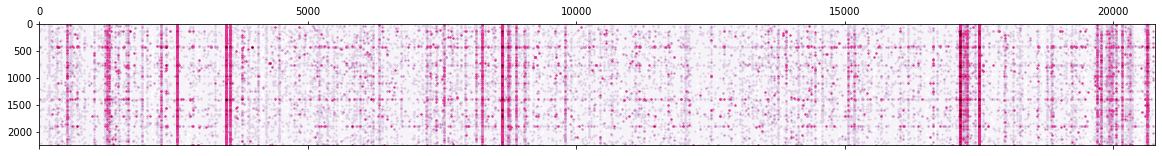

In [14]:
# plot the rest of the terms
plt.subplots(figsize=(20, 25))

for p, c in zip(precisions, colors):
    plt.spy(X_counts[:, 15000:], precision=p, markersize=1, color=c)

plt.show()

Moreover, matplotlib spy is able to filter data above specific precision.

From the first figure below, we can see that there are only about 10% of the terms that appear more than 5 times in one document. These terms may be the key for us to get nice classification results.

On the on hand, in the second figure below, there are some terms that appear more than 50 times in one document. These terms may be considered as stop terms.

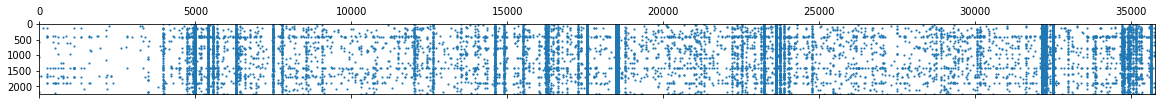

In [15]:
# terms that appear more than 5 times in one document
plt.subplots(figsize=(20, 25))
plt.spy(X_counts, precision=5, markersize=1)
plt.show()

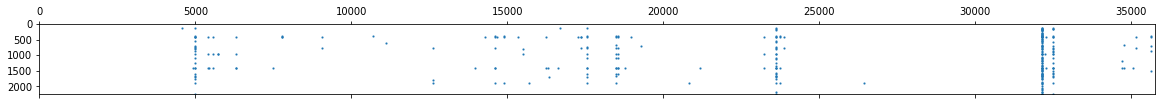

In [16]:
# terms that appear more than 50 times in one document
plt.subplots(figsize=(20, 25))
plt.spy(X_counts, precision=50, markersize=1)
plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

#### Answer here

In [17]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

In [18]:
col = ['coral', 'blue', 'black', 'm']

# plot 3D function
def plot3D(data, elev, azim):
    fig = plt.figure(figsize = (25,10))
    ax = Axes3D(fig)

    for c, category in zip(col, categories):
        xs = data[X['category_name'] == category].T[0]
        ys = data[X['category_name'] == category].T[1]
        zs = data[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', s=100, alpha=0.8)

    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')

    ax.view_init(elev, azim)
#     plt.savefig("3D_%d.png" % azim)
    plt.show()

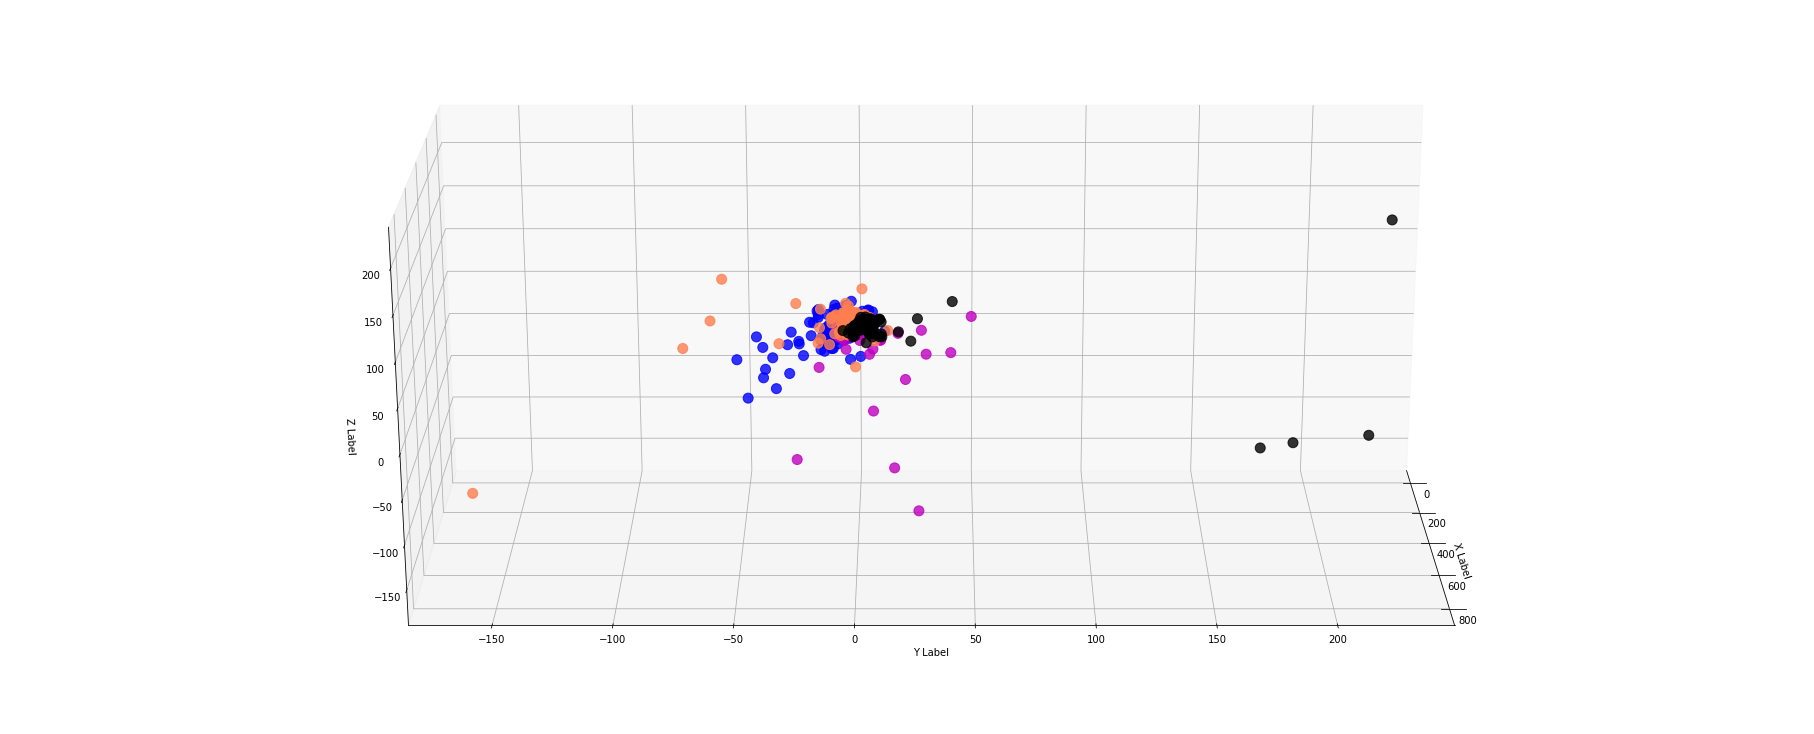

In [19]:
plot3D(X_reduced, 20, 0)

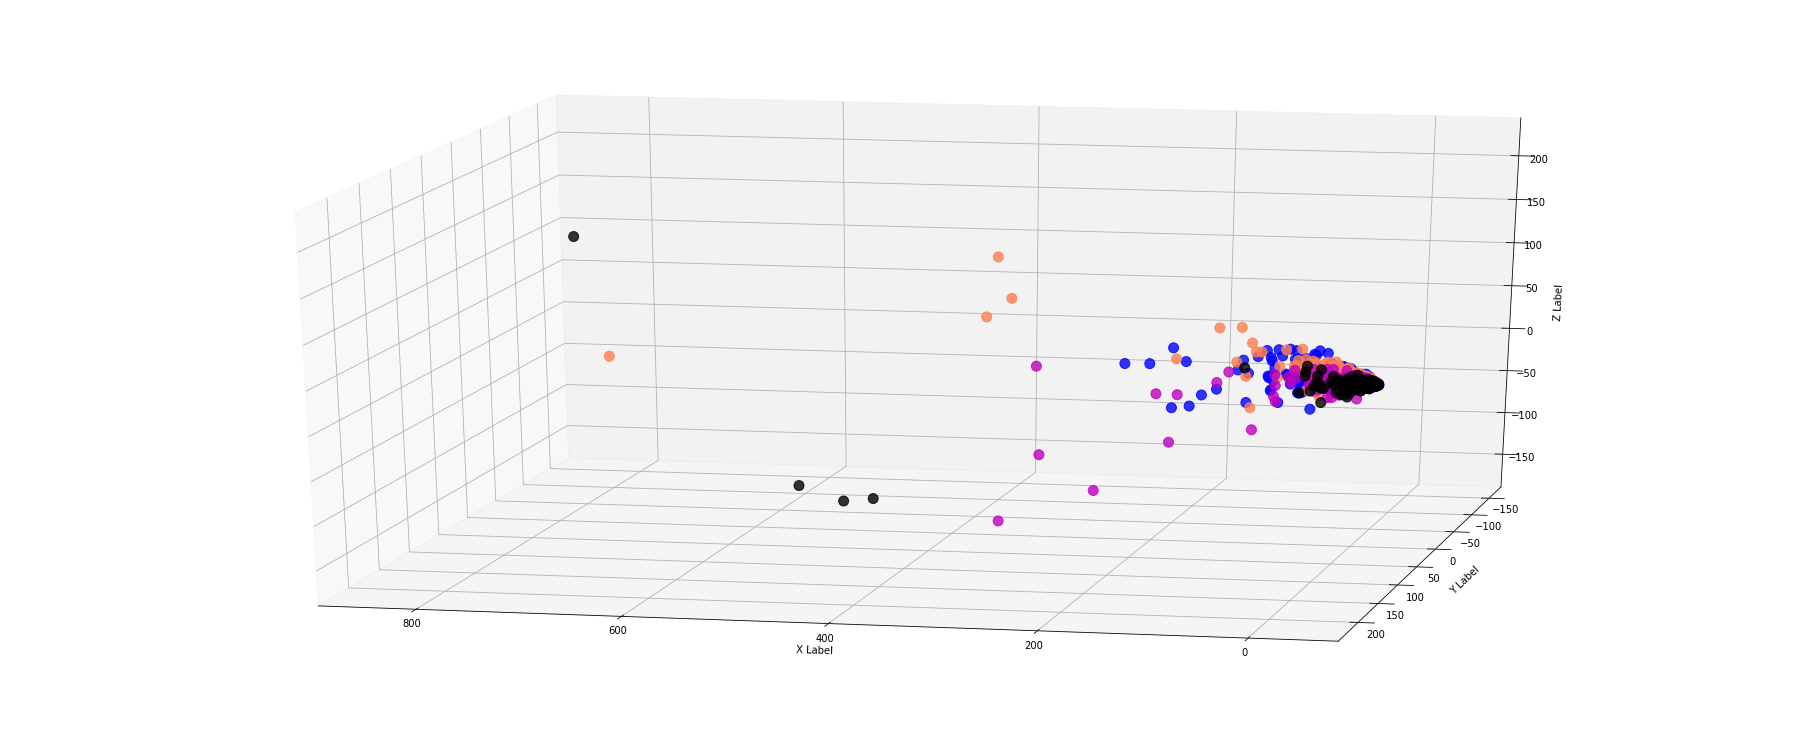

In [20]:
plot3D(X_reduced, 20, 102)

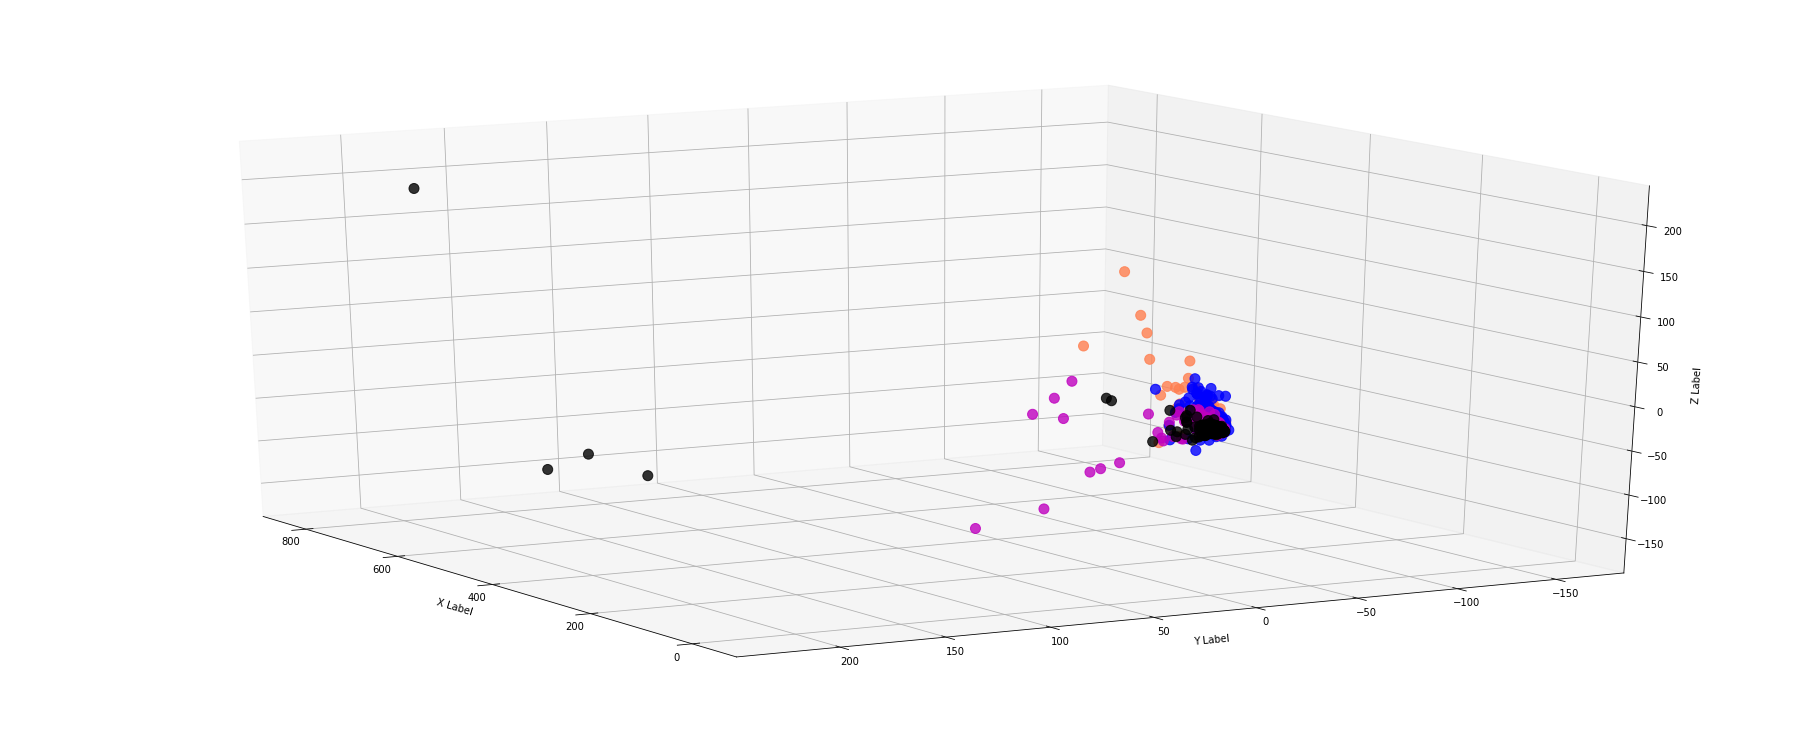

In [21]:
plot3D(X_reduced, 20, 150)

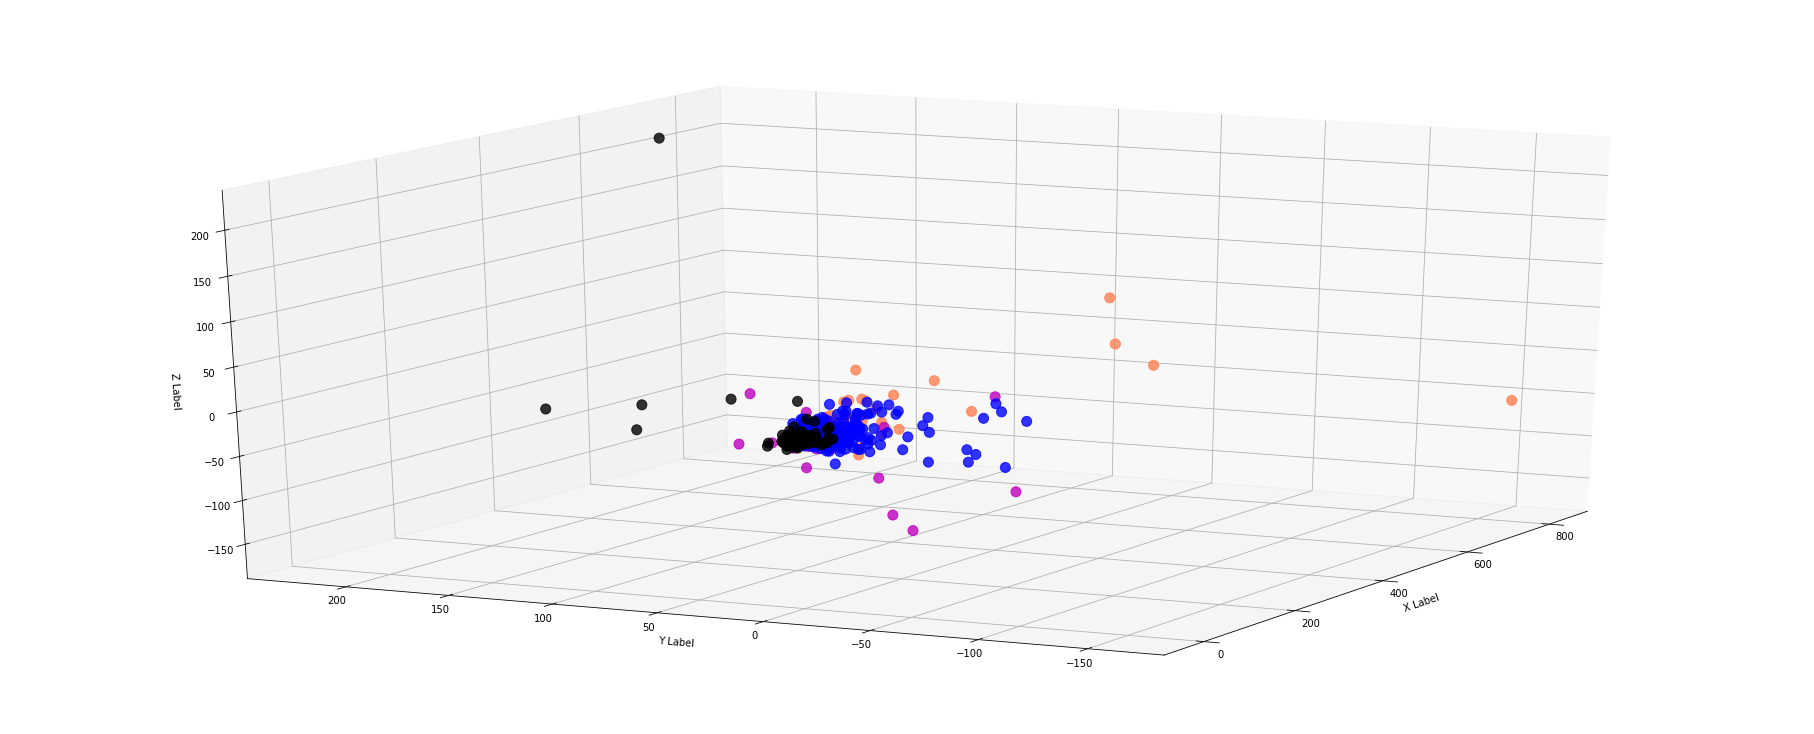

In [22]:
plot3D(X_reduced, 20, 207)

#### Observations
| angle | color arranged by distance from viewer |
| :---: | :------------------------------------: |
|  0  | black coral magenta blue |
| 102 | black magenta coral blue |
| 150 | black magenta blue coral |
| 207 | black blue magenta coral |

From different view points selected above,its seems that it is hard to categorize the news groups very well by only utilizing term vector.

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [23]:
term_frequencies = X_counts.toarray().sum(axis=0)
len(term_frequencies)

35788

#### Answer here

In [24]:
# using plotly to show interactive visualization among first 1000 terms
df_term_freq = pd.DataFrame({'freq': term_frequencies})

fig = px.bar(df_term_freq[:1000], y='freq')
fig.show()

---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


#### Answer here

In [25]:
threshold = 10
term_high_frequencies = term_frequencies[term_frequencies > threshold]

len(term_high_frequencies)

5850

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

#### Answer here

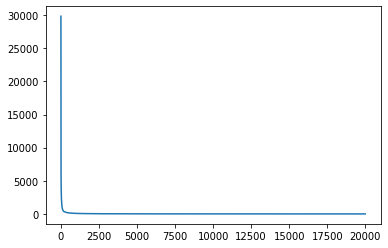

In [26]:
# plot term frequency distribution in descending order
N = 20000
index = np.arange(N)
term_frequencies_sorted = np.sort(term_frequencies)[::-1]

plt.plot(index, term_frequencies_sorted[:N])
plt.show()

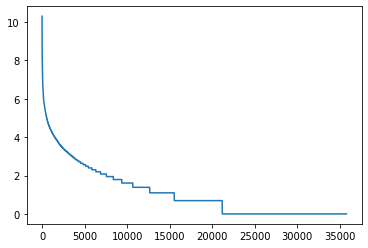

In [27]:
# plot term frequency log distribution in descending order
term_frequencies_log = [math.log(i) for i in term_frequencies]

N = X_counts.shape[1]
index = np.arange(N)
term_frequencies_log_sorted = np.sort(term_frequencies_log)[::-1]

plt.plot(index, term_frequencies_log_sorted[:N])
plt.show()

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

#### Answer here
Yes

In [28]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
mlb.classes_

array(['alt.atheism', 'comp.graphics', 'sci.med',
       'soc.religion.christian'], dtype='<U22')

In [29]:
X['bin_category'] = mlb.transform(X['category_name']).tolist()

In [30]:
X[:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category  
0           comp.graphics  [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]

---

---

# **Part 2&3: Data Preprocessing and Exploring With Sentiment Labelled Sentences Data Set**

In [31]:
import os
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [32]:
# setting your own relative data_path for trainning set
dir_data = 'sentiment labelled sentences'

f_imdb = os.path.join(dir_data, 'imdb_labelled.txt')
f_amazon = os.path.join(dir_data, 'amazon_cells_labelled.txt')
f_yelp = os.path.join(dir_data, 'yelp_labelled.txt')

# read file and convert into pandas dataframe
df_imdb = dmhwh.convert_file_to_dataframe(f_imdb)
df_amazon = dmhwh.convert_file_to_dataframe(f_amazon)
df_yelp = dmhwh.convert_file_to_dataframe(f_yelp)

df_data = pd.concat([df_imdb, df_amazon, df_yelp])
df_data.head()

sentence label
0  A very, very, very slow-moving, aimless movie ...     0
1  Not sure who was more lost - the flat characte...     0
2  Attempting artiness with black & white and cle...     0
3       Very little music or anything to speak of.       0
4  The best scene in the movie was when Gerardo i...     1

In [33]:
len(df_data)

3000

In [34]:
df_data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
dtype: object

In [35]:
# remove punctuation
translator = str.maketrans('', '', string.punctuation)
df_data['sentence'] = df_data['sentence'].apply(lambda s : s.translate(translator))
# turn into lower case
df_data['sentence'] = df_data['sentence'].apply(lambda s : s.lower())

In [36]:
sum(df_data.duplicated())

29

In [37]:
df_data.drop_duplicates(subset='sentence', inplace=True)
len(df_data)

2971

In [38]:
# generate document-term matrix
count_vect_p2 = CountVectorizer()
data_counts = count_vect_p2.fit_transform(df_data.sentence)
data_counts.shape

(2971, 5376)

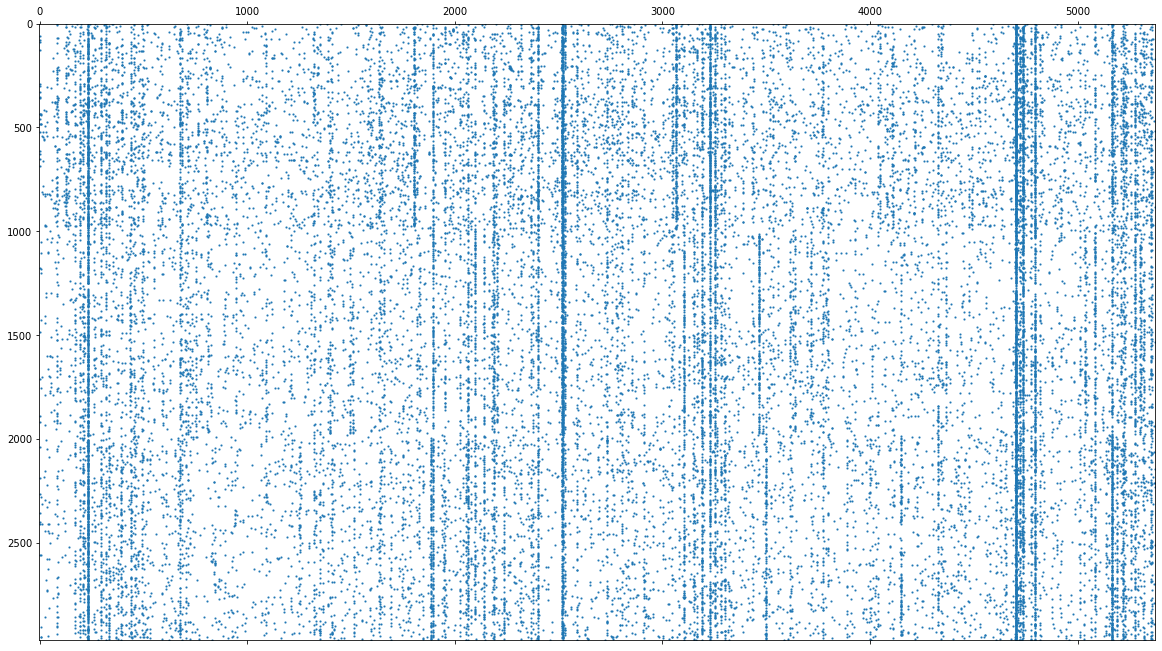

In [39]:
# use matplotlib spy to plot the term matrix above specific precision.
dmhwh.plot_term_matrix(data_counts, 0)

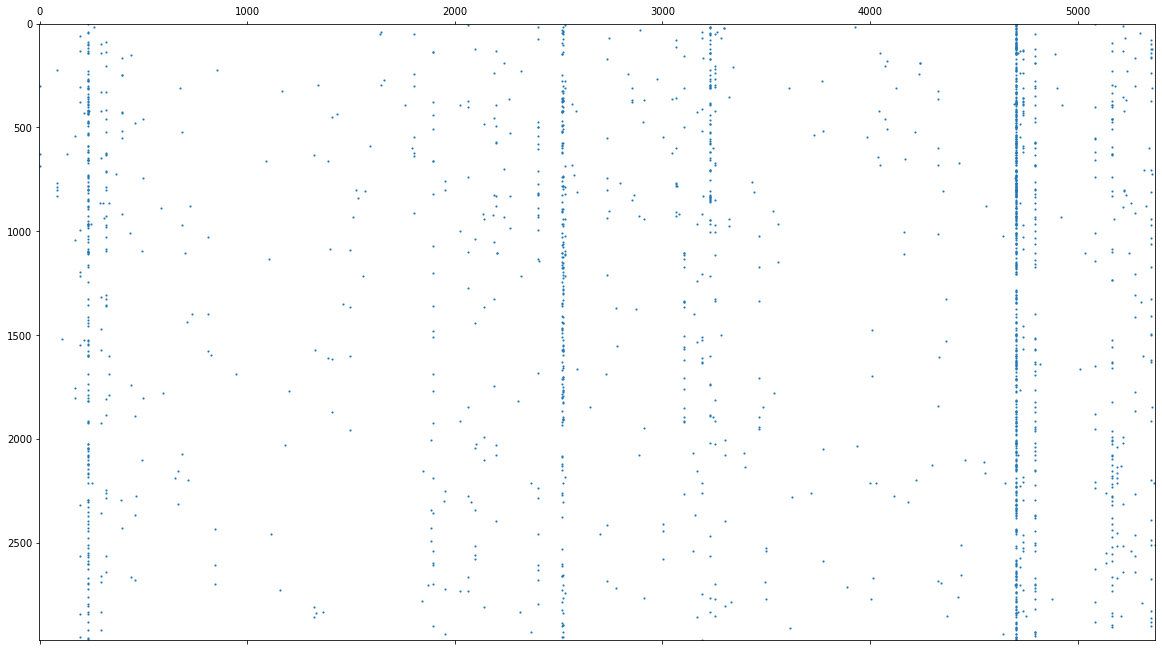

In [40]:
dmhwh.plot_term_matrix(data_counts, 1)

In [41]:
# term frequency count in positive comments
pos_term_frequencies = data_counts[(df_data['label'] == '1').values].toarray().sum(axis=0)

In [42]:
# term frequency count in negative comments
neg_term_frequencies = data_counts[(df_data['label'] == '0').values].toarray().sum(axis=0)

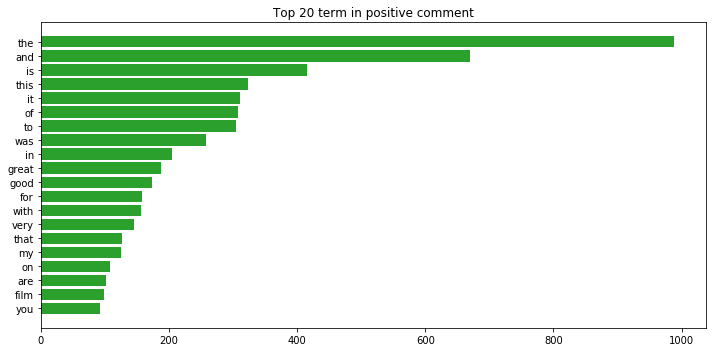

In [43]:
# plot the top 20 term with most appearance in positive comment

N = 20
index = np.arange(N)

pos_top_20_term = []
for i in np.argsort(pos_term_frequencies)[::-1][:N]:
    pos_top_20_term.append(count_vect_p2.get_feature_names()[i])
y = np.sort(pos_term_frequencies)[::-1][:N]

fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()

ax.set_title('Top 20 term in positive comment')
ax.barh(index, y, align='center', color='tab:green')
ax.set_yticks(index)
ax.set_yticklabels(pos_top_20_term)
ax.invert_yaxis()

fig.tight_layout()
plt.show()

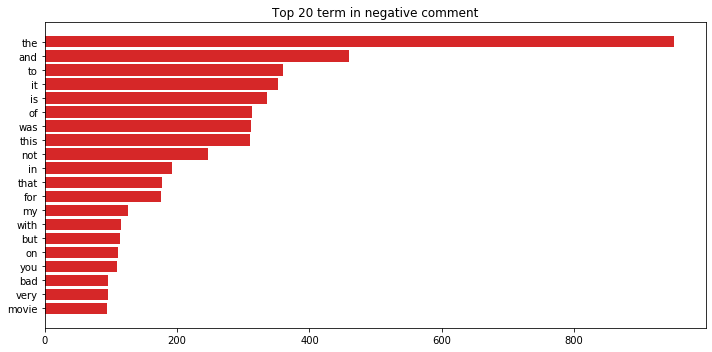

In [44]:
# plot the top 20 term with most appearance in negative comment

N = 20
index = np.arange(N)

neg_top_20_term = []
for i in np.argsort(neg_term_frequencies)[::-1][:N]:
    neg_top_20_term.append(count_vect_p2.get_feature_names()[i])
y = np.sort(neg_term_frequencies)[::-1][:N]

fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()

ax.set_title('Top 20 term in negative comment')
ax.barh(index, y, align='center', color='tab:red')
ax.set_yticks(index)
ax.set_yticklabels(neg_top_20_term)
ax.invert_yaxis()

fig.tight_layout()
plt.show()

In [45]:
# generate tfidf features
tfidf_vect_p2 = TfidfVectorizer()
data_tfidf = tfidf_vect_p2.fit_transform(df_data.sentence)
data_tfidf.shape

(2971, 5376)

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [47]:
# Use term frequency features to build classifiers.

x = data_counts
y = df_data['label']
    
mnb = MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

cross_val_score(mnb, x, y, scoring='accuracy', cv=10).mean()

0.820589053055496

In [48]:
# Use tfidf features to build classifiers.

x = data_tfidf
y = df_data['label']
    
mnb = MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

cross_val_score(mnb, x, y, scoring='accuracy', cv=10).mean()

0.82124771965376

#### Observation
It seems that there is no significant difference between the cross value score of the two classifiers. 

---

---

# **Part 4: Fourth: Data preprocessing improvement**

In [49]:
import time

### Use spy in matplotlib instead of seaborn heatmap to visualize sparse term matrix

As shown in exercise 11, we utilize matplotlib spy function to get heatmap-like visualization. If we adopt the original method, it would be nearly impossible to plot the whole matrix in only few figures.

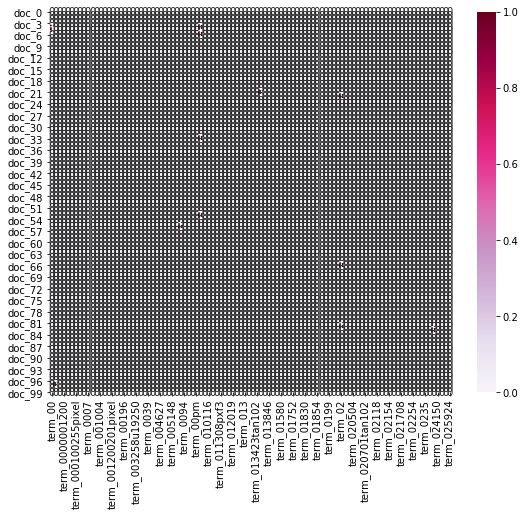

time : 16.045097827911377 sec


In [50]:
# use news group data set to compare the execution time to plot term matrix
# original method
# showing first fifty features only
N = 100
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:N]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:N]]
plot_z = X_counts[:N, :N].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

start = time.time()

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.show()

print(f'time : {time.time() - start} sec')

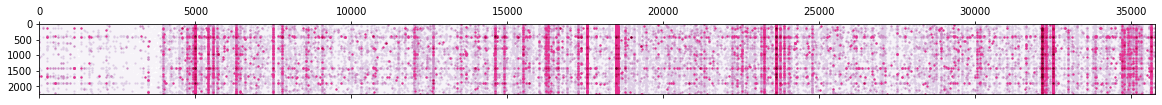

time : 0.597426176071167 sec


In [51]:
# new method
start = time.time()

plt.subplots(figsize=(20, 25))

for p, c in zip(precisions, colors):
    plt.spy(X_counts, precision=p, markersize=1, color=c)

plt.show()

print(f'time : {time.time() - start} sec')

### term frequencies compute time reduction

Instead of using python build in sum function, we use numpy.sum to sum over ndarray. 

In [52]:
# use new data set to compare the execution time to compute term frequencies
# original method
start = time.time()

term_frequencies_first_100_doc = []
for j in range(0, data_counts[:100].shape[1]):
    term_frequencies_first_100_doc.append(sum(data_counts[:,j].toarray()))
    
print(f'time : {time.time() - start} sec')

time : 8.707716703414917 sec


In [53]:
# new method
start = time.time()

term_frequencies_first_100_doc = data_counts[:100].toarray().sum(axis=0)

print(f'time : {time.time() - start} sec')

time : 0.0029916763305664062 sec
